In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


In the context of the "Healthcare Provider Fraud Detection Analysis" dataset, understanding the distinction between **inpatient** and **outpatient** care is crucial:

**Inpatient Care:**
- **Definition:** Treatment provided to patients admitted to a hospital or medical facility, requiring at least one overnight stay.
- **Characteristics:** Involves continuous monitoring and comprehensive care for serious conditions, surgeries, or treatments necessitating prolonged observation.
- **Examples:** Childbirth, major surgeries, severe illnesses, or complex medical conditions requiring intensive care.

In [2]:
# function to clean column names
def clear_cols(s):
    return s.strip().replace(" ","_")

# load data
path = '../Healthcare Provider Fraud Detection Analysis/Test_Inpatientdata-1542969243754.csv'
df = pd.read_csv(path).rename(columns=clear_cols)
# set display options
pd.set_option('display.max_columns', 50)

In [3]:
# combining the inpatient and beneficiary data
path2 = '../Healthcare Provider Fraud Detection Analysis/Test_Beneficiarydata-1542969243754.csv'
df2 = pd.read_csv(path2).rename(columns=clear_cols)
new_df = df.merge(df2, on='BeneID')


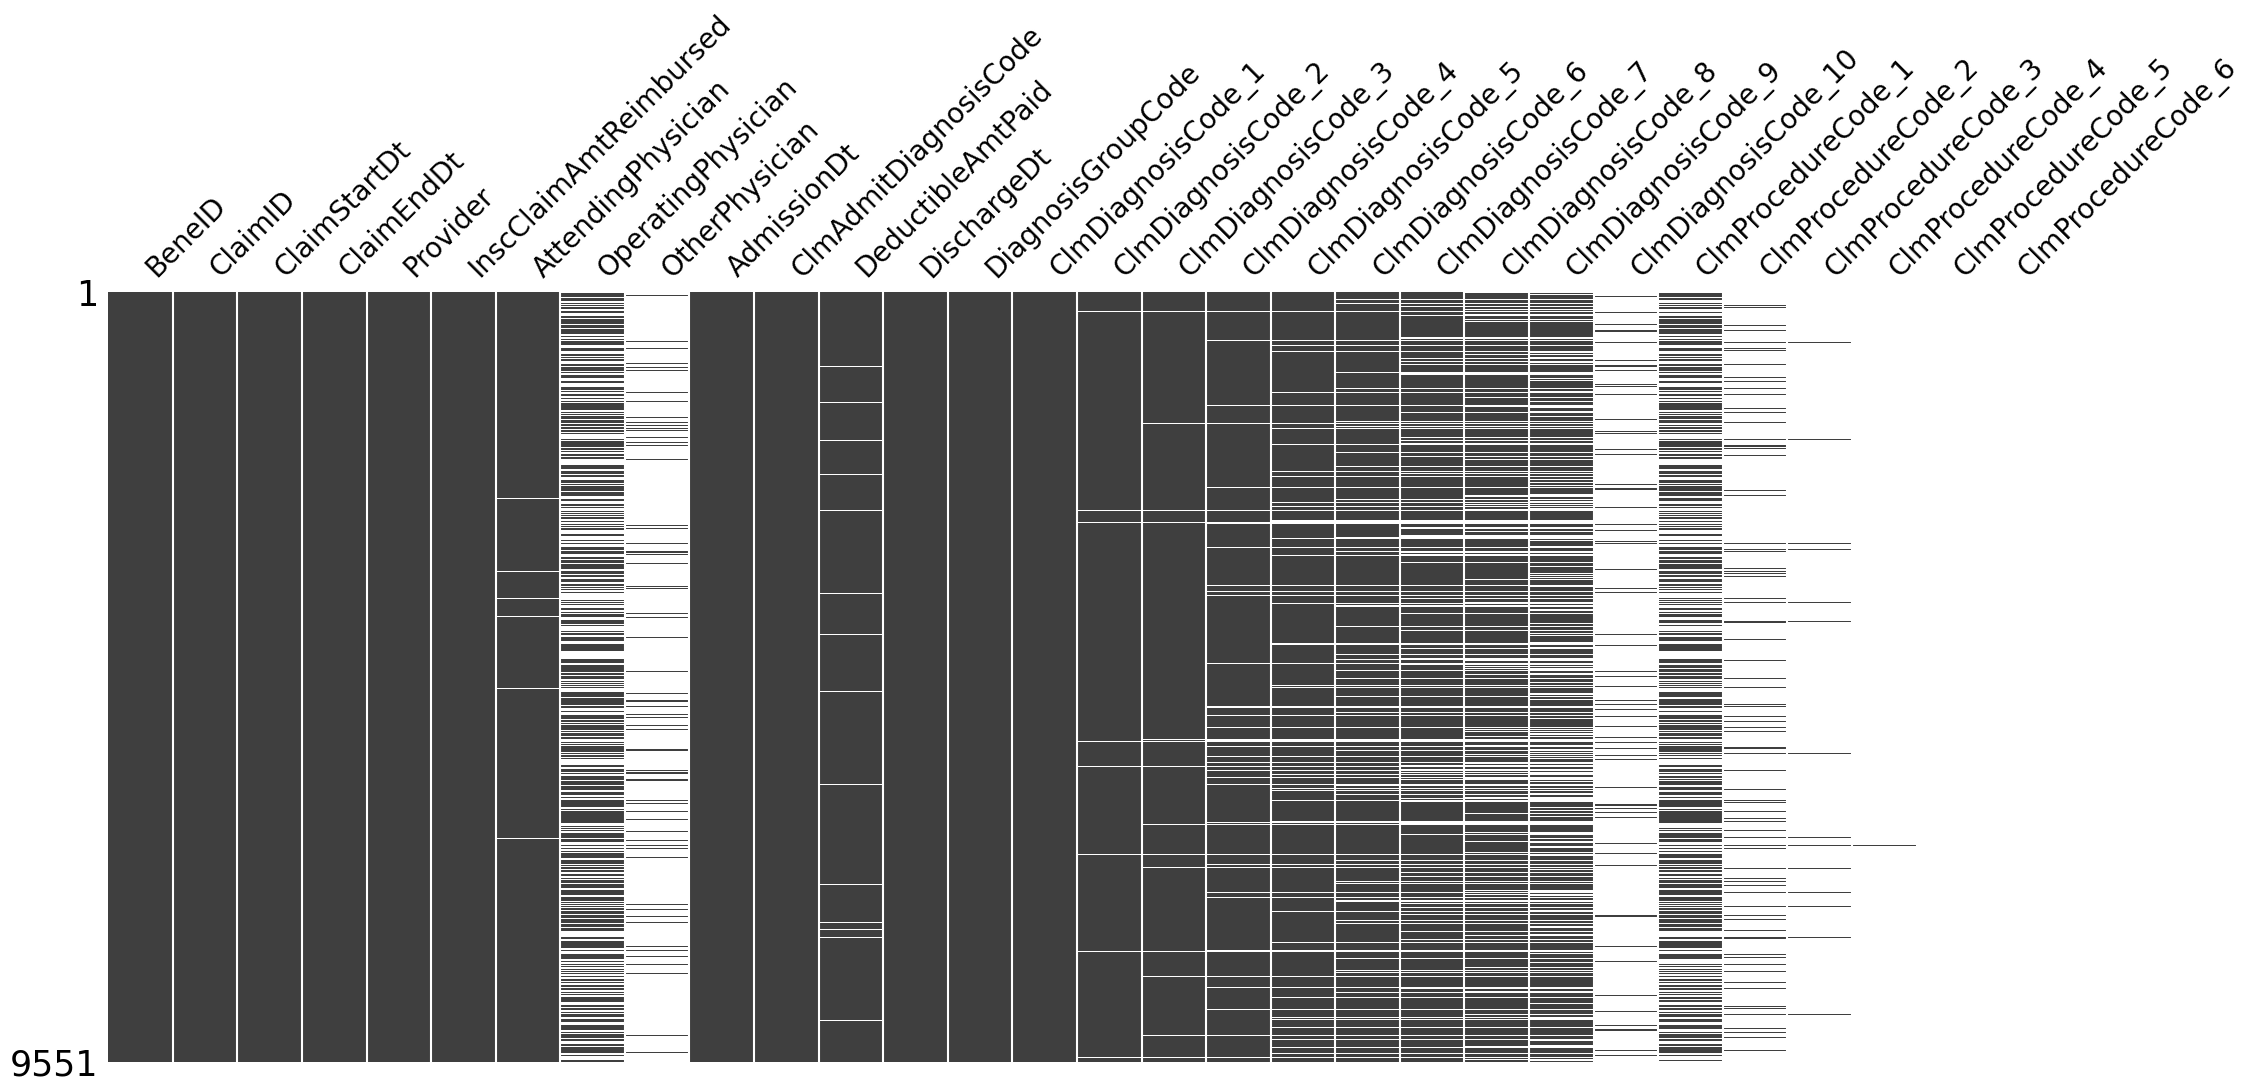

In [4]:
msno.matrix(df, sparkline=False, fontsize=20)
plt.show()

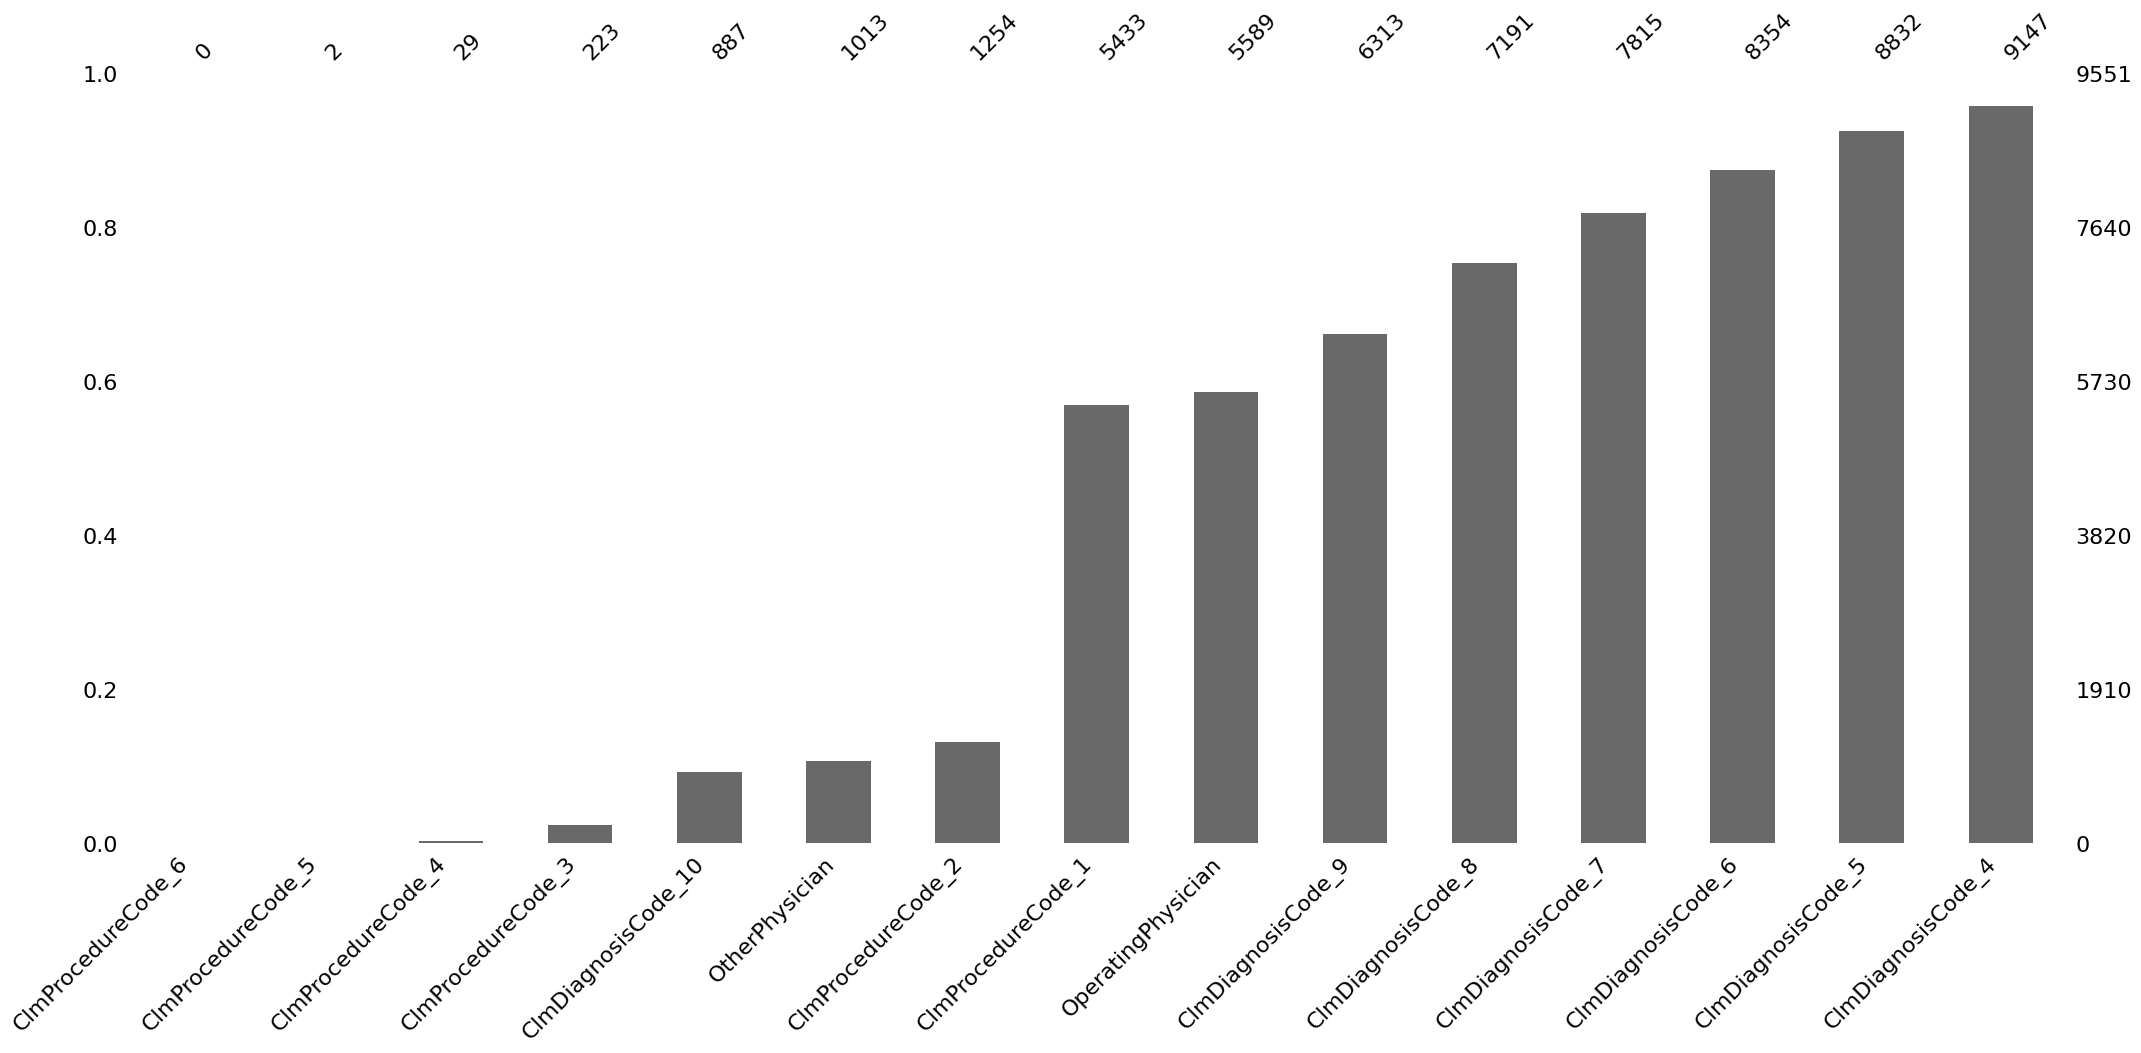

In [5]:
# Calculating the percentage of missing values for each column
missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100

# Combining the counts and percentages into a DataFrame for better visualization
missing_info = pd.DataFrame({'Missing Values': missing_data, 'Percentage': missing_percentage})

# Sort the DataFrame columns by the percentage of missing values
sorted_df = df[missing_info.sort_values(by='Percentage', ascending=False).index]

# Select the top 15 columns with the most missing values
top_15_missing = sorted_df.iloc[:, :15]

#Visual with missingno
msno.bar(top_15_missing)
plt.show()

# <center>Exploratory Data Analysis

In [6]:
print("shape: ", df.shape)
df.head()

shape:  (9551, 30)


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11014,CLM67387,2009-09-09,2009-09-16,PRV57070,9000,PHY317786,PHY427017,NaN,2009-09-09,5789,1068.0,2009-09-16,332,5780,5533,496,V420,40390,2851,5990,570,41071,4280,4443.0,5849.0,NaN,NaN,NaN,NaN
1,BENE11017,CLM31237,2008-12-25,2009-01-08,PRV54750,14000,PHY314656,PHY426644,NaN,2008-12-25,5939,1068.0,2009-01-08,661,1889,41071,5990,5601,4588,5845,4549,29570,34831,NaN,5551.0,NaN,NaN,NaN,NaN,NaN
2,BENE11026,CLM78930,2009-12-09,2009-12-13,PRV53758,2000,PHY349495,NaN,NaN,2009-12-09,4019,1068.0,2009-12-13,241,4010,78791,60000,41401,V1254,4372,78650,7813,4254,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11031,CLM56810,2009-06-23,2009-07-06,PRV55825,16000,PHY429538,PHY371893,NaN,2009-06-23,8208,1068.0,2009-07-06,564,8208,4168,920,5990,40391,2859,4254,41400,5849,41401,8152.0,3320.0,NaN,NaN,NaN,NaN
4,BENE11085,CLM34625,2009-01-20,2009-01-31,PRV52338,19000,PHY397161,NaN,NaN,2009-01-20,4279,1068.0,2009-01-31,880,29654,V142,78702,30503,V140,V4582,V6109,7242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* Shape of dataset: `9,551` rows, and `30` columns.
* So I have `520` Providers in the dataset.
* Number of OperatingPhysician -> `1,870`.
* Number of AttendingPhysician -> `2,657`.
* Number of OtherPhysician  -> `658`.
* Claim start date starts at `2008-11-27` and ends at `2009-12-31`.
* Claim end date starts at `2009-01-01` and ends at `2009-12-31`.

In [7]:
df.columns.to_list()

['BeneID',
 'ClaimID',
 'ClaimStartDt',
 'ClaimEndDt',
 'Provider',
 'InscClaimAmtReimbursed',
 'AttendingPhysician',
 'OperatingPhysician',
 'OtherPhysician',
 'AdmissionDt',
 'ClmAdmitDiagnosisCode',
 'DeductibleAmtPaid',
 'DischargeDt',
 'DiagnosisGroupCode',
 'ClmDiagnosisCode_1',
 'ClmDiagnosisCode_2',
 'ClmDiagnosisCode_3',
 'ClmDiagnosisCode_4',
 'ClmDiagnosisCode_5',
 'ClmDiagnosisCode_6',
 'ClmDiagnosisCode_7',
 'ClmDiagnosisCode_8',
 'ClmDiagnosisCode_9',
 'ClmDiagnosisCode_10',
 'ClmProcedureCode_1',
 'ClmProcedureCode_2',
 'ClmProcedureCode_3',
 'ClmProcedureCode_4',
 'ClmProcedureCode_5',
 'ClmProcedureCode_6']

In [8]:
df.describe()

,InscClaimAmtReimbursed,DeductibleAmtPaid,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
count,9551.000000,9355.0,5433.000000,1254.000000,223.000000,29.000000,2.000000,0.0
mean,10105.306251,1068.0,5907.846310,4141.271930,4159.206278,4509.931034,7055.500000,NaN
std,10316.862711,0.0,3055.573174,2047.600995,2158.192869,2571.379659,4124.553855,NaN
min,0.000000,1068.0,14.000000,42.000000,185.000000,260.000000,4139.000000,NaN
25%,4000.000000,1068.0,3891.000000,2749.000000,2724.000000,3320.000000,5597.250000,NaN
50%,7000.000000,1068.0,5369.000000,4019.000000,4019.000000,4263.000000,7055.500000,NaN
75%,12000.000000,1068.0,8741.000000,4439.000000,5119.000000,5781.000000,8513.750000,NaN
max,125000.000000,1068.0,9999.000000,9998.000000,9984.000000,9971.000000,9972.000000,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   BeneID                  9551 non-null   object 
 1   ClaimID                 9551 non-null   object 
 2   ClaimStartDt            9551 non-null   object 
 3   ClaimEndDt              9551 non-null   object 
 4   Provider                9551 non-null   object 
 5   InscClaimAmtReimbursed  9551 non-null   int64  
 6   AttendingPhysician      9520 non-null   object 
 7   OperatingPhysician      5589 non-null   object 
 8   OtherPhysician          1013 non-null   object 
 9   AdmissionDt             9551 non-null   object 
 10  ClmAdmitDiagnosisCode   9551 non-null   object 
 11  DeductibleAmtPaid       9355 non-null   float64
 12  DischargeDt             9551 non-null   object 
 13  DiagnosisGroupCode      9551 non-null   object 
 14  ClmDiagnosisCode_1      9551 non-null   

In [10]:
print(f"Unique beneid: {df['BeneID'].nunique()}")
print(f"Unique claimid: {df['ClaimID'].nunique()}\n")
print(f"Ratio beneid: {df['BeneID'].nunique()/df.shape[0]}")
print(f"Ratio claimid: {df['ClaimID'].nunique()/df.shape[0]}")

Unique beneid: 8351
Unique claimid: 9551

Ratio beneid: 0.8743587058946707
Ratio claimid: 1.0


### Update data types for columns

I want to update the folowing columns to datetime type: 
* ClaimStartDt  -   `claim start date`
* ClaimEndDt    -   `claim end date`
* AdmissionDt   -   `admission date`
* DischargeDt   -   `discharge date`

In [11]:
df['ClaimStartDt'] = pd.to_datetime(df['ClaimStartDt'])
df['ClaimEndDt'] = pd.to_datetime(df['ClaimEndDt'])
df['AdmissionDt'] = pd.to_datetime(df['AdmissionDt'])
df['DischargeDt'] = pd.to_datetime(df['DischargeDt'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   BeneID                  9551 non-null   object        
 1   ClaimID                 9551 non-null   object        
 2   ClaimStartDt            9551 non-null   datetime64[ns]
 3   ClaimEndDt              9551 non-null   datetime64[ns]
 4   Provider                9551 non-null   object        
 5   InscClaimAmtReimbursed  9551 non-null   int64         
 6   AttendingPhysician      9520 non-null   object        
 7   OperatingPhysician      5589 non-null   object        
 8   OtherPhysician          1013 non-null   object        
 9   AdmissionDt             9551 non-null   datetime64[ns]
 10  ClmAdmitDiagnosisCode   9551 non-null   object        
 11  DeductibleAmtPaid       9355 non-null   float64       
 12  DischargeDt             9551 non-null   datetime

In [12]:
# presentage of missing values
df.isna().sum()/len(df) *100

BeneID                      0.000000
ClaimID                     0.000000
ClaimStartDt                0.000000
ClaimEndDt                  0.000000
Provider                    0.000000
InscClaimAmtReimbursed      0.000000
AttendingPhysician          0.324573
OperatingPhysician         41.482567
OtherPhysician             89.393781
AdmissionDt                 0.000000
ClmAdmitDiagnosisCode       0.000000
DeductibleAmtPaid           2.052141
DischargeDt                 0.000000
DiagnosisGroupCode          0.000000
ClmDiagnosisCode_1          0.000000
ClmDiagnosisCode_2          0.565386
ClmDiagnosisCode_3          1.769448
ClmDiagnosisCode_4          4.229924
ClmDiagnosisCode_5          7.528008
ClmDiagnosisCode_6         12.532719
ClmDiagnosisCode_7         18.176107
ClmDiagnosisCode_8         24.709455
ClmDiagnosisCode_9         33.902209
ClmDiagnosisCode_10        90.713014
ClmProcedureCode_1         43.115904
ClmProcedureCode_2         86.870485
ClmProcedureCode_3         97.665166
C

In [13]:
df['DiagnosisGroupCode'].value_counts()

DiagnosisGroupCode
885    51
187    49
180    46
882    45
177    44
       ..
920     1
123     1
780     1
844     1
124     1
Name: count, Length: 712, dtype: int64

In [14]:
# Converting to integer and checking if there are any non-integer values
def int_check(col):
    """
    To check if all the values in a column are integers.
    col: column to check
    """
    try:
        df[col] = df[col].astype(int)
        print("All values are integers.")
    except ValueError as e:
        print("There are non-integer values in the column.")



In [15]:
# Identify non-integer values using regex
non_integers = df[~df['DiagnosisGroupCode'].str.match(r'^\d+$')]

# Count the non-integer values
non_integer_count = len(non_integers)

print(f"There are {non_integer_count} non-integer values.")


There are 29 non-integer values.


In [16]:
non_integers.nunique()

BeneID                    29
ClaimID                   29
ClaimStartDt              29
ClaimEndDt                28
Provider                  28
InscClaimAmtReimbursed     2
AttendingPhysician        28
OperatingPhysician        16
OtherPhysician             1
AdmissionDt               29
ClmAdmitDiagnosisCode     23
DeductibleAmtPaid          1
DischargeDt               28
DiagnosisGroupCode         1
ClmDiagnosisCode_1        25
ClmDiagnosisCode_2        25
ClmDiagnosisCode_3        26
ClmDiagnosisCode_4        25
ClmDiagnosisCode_5        23
ClmDiagnosisCode_6        21
ClmDiagnosisCode_7        20
ClmDiagnosisCode_8        20
ClmDiagnosisCode_9        12
ClmDiagnosisCode_10        2
ClmProcedureCode_1        15
ClmProcedureCode_2         2
ClmProcedureCode_3         0
ClmProcedureCode_4         0
ClmProcedureCode_5         0
ClmProcedureCode_6         0
dtype: int64

In [17]:
print(f"Number of providers in the dataset -> {df['Provider'].nunique()}.")

Number of providers in the dataset -> 520.


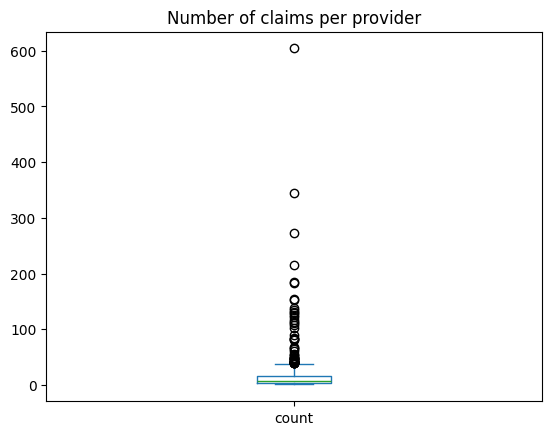

In [18]:
df['Provider'].value_counts().plot(kind='box')
plt.title('Number of claims per provider')
plt.show()

Text(0.5, 1.0, 'Number of claims per provider')

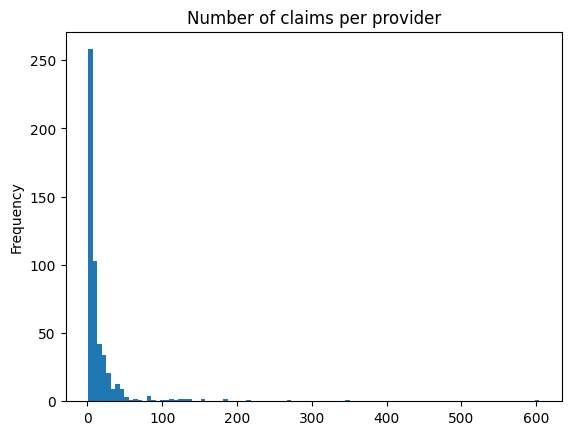

In [19]:
df['Provider'].value_counts().plot(kind='hist', bins=100)
plt.title('Number of claims per provider')

In [20]:
print(f"Number of attendings -> {df['AttendingPhysician'].nunique()}")
# OperatingPhysician

Number of attendings -> 2657


In [21]:
df.groupby('AttendingPhysician')['Provider'].nunique().sort_values(ascending=False)

AttendingPhysician
PHY380641    2
PHY374646    2
PHY394050    2
PHY383450    2
PHY378358    2
            ..
PHY352602    1
PHY352616    1
PHY352620    1
PHY352645    1
PHY434130    1
Name: Provider, Length: 2657, dtype: int64

In [22]:
print(f"Number of OperatingPhysician -> {df['OperatingPhysician'].nunique()}")
print(f"Number of AttendingPhysician -> {df['AttendingPhysician'].nunique()}")
print(f"Number of OtherPhysician  -> {df['OtherPhysician'].nunique()}")

Number of OperatingPhysician -> 1870
Number of AttendingPhysician -> 2657
Number of OtherPhysician  -> 658


In [23]:
# Claim start date starts at 2008-11-27 and ends at 2009-12-31
df['ClaimStartDt'].min(), df['ClaimStartDt'].max()

(Timestamp('2008-11-27 00:00:00'), Timestamp('2009-12-31 00:00:00'))

In [24]:
# Claim end date starts at 2009-01-01 and ends at 2009-12-31
df['ClaimEndDt'].min(), df['ClaimEndDt'].max()

(Timestamp('2009-01-01 00:00:00'), Timestamp('2009-12-31 00:00:00'))

Text(0.5, 1.0, 'Top 10 most common disease codes')

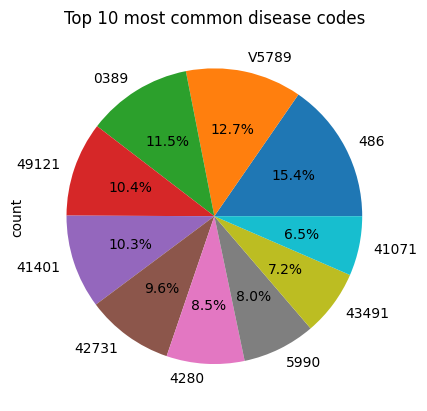

In [25]:
df['ClmDiagnosisCode_1'].value_counts().nlargest(10).plot(kind='pie', autopct='%1.1f%%')
plt.title('Top 10 most common disease codes')

Text(0.5, 1.0, 'Top 10 most common disease codes 2')

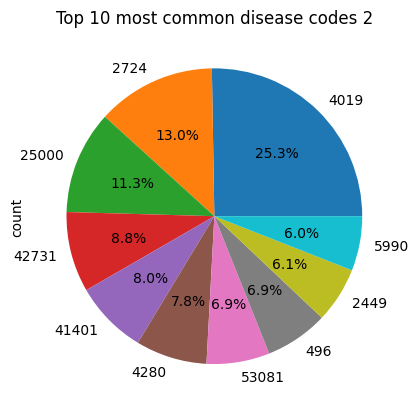

In [26]:
df['ClmDiagnosisCode_2'].value_counts().nlargest(10).plot(kind='pie', autopct='%1.1f%%')
plt.title('Top 10 most common disease codes 2')

Text(0.5, 1.0, 'Top 10 most common disease codes 3')

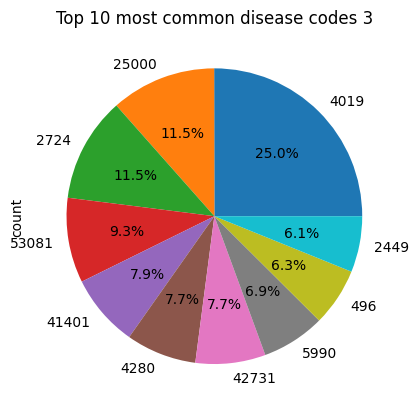

In [27]:
df['ClmDiagnosisCode_3'].value_counts().nlargest(10).plot(kind='pie', autopct='%1.1f%%')
plt.title('Top 10 most common disease codes 3')

In [28]:
df.mode().iloc[0]

BeneID                             BENE115325
ClaimID                              CLM31002
ClaimStartDt              2009-02-01 00:00:00
ClaimEndDt                2009-06-18 00:00:00
Provider                             PRV53866
InscClaimAmtReimbursed                 4000.0
AttendingPhysician                  PHY329480
OperatingPhysician                  PHY350998
OtherPhysician                      PHY335869
AdmissionDt               2009-02-01 00:00:00
ClmAdmitDiagnosisCode                   78605
DeductibleAmtPaid                      1068.0
DischargeDt               2009-06-18 00:00:00
DiagnosisGroupCode                        885
ClmDiagnosisCode_1                        486
ClmDiagnosisCode_2                       4019
ClmDiagnosisCode_3                       4019
ClmDiagnosisCode_4                       4019
ClmDiagnosisCode_5                       4019
ClmDiagnosisCode_6                       4019
ClmDiagnosisCode_7                       4019
ClmDiagnosisCode_8                

In [29]:
df['DeductibleAmtPaid'].value_counts()

DeductibleAmtPaid
1068.0    9355
Name: count, dtype: int64

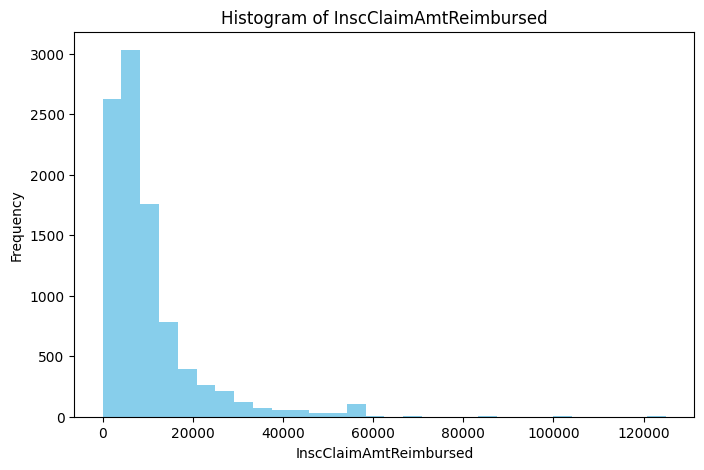

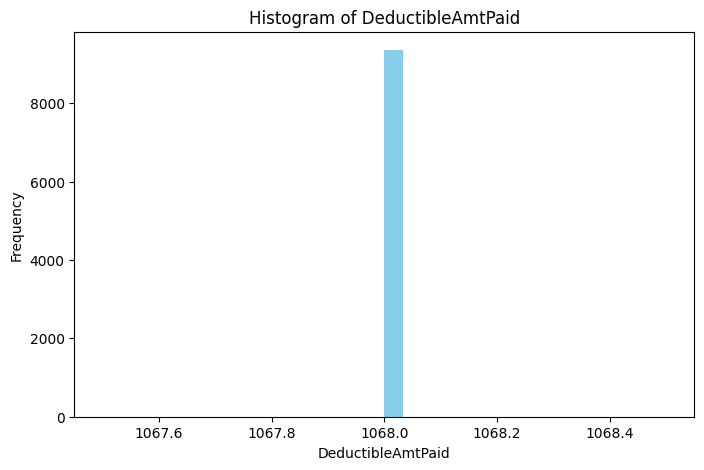

In [30]:

def plot_hist(cols):
    """
    Plots histograms for the specified columns in the dataframe.

    Parameters:
        cols (list): List of column names to plot.
    """
    for col in cols:
        if col in df.columns:
            plt.figure(figsize=(8, 5))
            df[col].plot(kind='hist', bins=30, color='skyblue')
            plt.title(f'Histogram of {col}')
            plt.xlabel(col)
            plt.ylabel('Frequency')
            plt.show()

# plot histograms for the following columns
plot_hist(['InscClaimAmtReimbursed', 'DeductibleAmtPaid'])

In [31]:
# I want to generate the top 10 values for each diagnosis code column
# Get all diagnosis code columns
diag_cols = [f'ClmDiagnosisCode_{i}' for i in range(1,11)]

# Create empty dataframe to store top values
top_values = pd.DataFrame()

# Get top 10 values for each column
for col in diag_cols:
    top_values[col] = df[col].value_counts().nlargest(10).index

# Create binary matrix of value occurrences
value_matrix = pd.DataFrame()
all_unique_values = top_values.values.ravel()
all_unique_values = pd.Series(all_unique_values).value_counts()

# Keep only values that appear in multiple columns
repeated_values = all_unique_values[all_unique_values > 1]

# # Create and plot heatmap
# plt.figure(figsize=(15, 8))
# sns.heatmap(top_values.isin(repeated_values.index).T, 
#             cmap='YlOrRd', 
#             cbar_kws={'label': 'Present in Top 10'})
# plt.title('Common Diagnosis Codes Across Columns')
# plt.xlabel('Top 10 Rank Position')
# plt.ylabel('Diagnosis Code Column')
# plt.tight_layout()
# plt.show()

In [32]:
# quick look at top 10 diagnosis codes
top_values

,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10
0,486,4019,4019,4019,4019,4019,4019,4019,4019,4019
1,V5789,2724,25000,25000,2724,2724,2724,2724,2724,25000
2,0389,25000,2724,2724,25000,25000,25000,25000,25000,41401
3,49121,42731,53081,41401,4280,41401,4280,42731,42731,4280
4,41401,41401,41401,4280,41401,4280,42731,5990,4280,2724
5,42731,4280,4280,53081,53081,42731,5990,41401,5990,5990
6,4280,53081,42731,2449,42731,496,41401,4280,53081,53081
7,5990,496,5990,42731,5990,53081,53081,53081,41401,2948
8,43491,2449,496,5990,496,5990,496,2449,5849,2449
9,41071,5990,2449,496,40390,2449,40390,5849,496,496


# Starting to work on the Inpatient and Beneficiary data together

In [33]:
# quick look at the data
new_df.sample(3)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,...,ClmProcedureCode_6,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
9323,BENE155597,CLM39645,2009-02-22,2009-02-25,PRV54647,10000,PHY372470,NaN,NaN,2009-02-22,4280,1068.0,2009-02-25,864,03811,78552,59080,486,53081,5849,34982,70703,4280,NaN,NaN,...,NaN,1929-02-01,NaN,2,2,0,29,10,12,12,2,1,1,2,2,2,2,2,1,1,1,23210,2136,110,50
2889,BENE56052,CLM75917,2009-11-14,2009-11-16,PRV51407,2000,PHY412004,NaN,NaN,2009-11-14,5589,1068.0,2009-11-16,625,2761,2724,V5867,73300,1101,2948,29532,5589,V1254,NaN,NaN,...,NaN,1929-12-01,NaN,1,1,0,5,500,12,12,1,2,2,2,2,2,2,1,1,2,2,2000,1068,5100,900
7073,BENE121124,CLM74424,2009-11-02,2009-11-08,PRV53948,5000,PHY405839,NaN,NaN,2009-11-02,4580,1068.0,2009-11-08,664,5849,41400,72888,27651,3320,56969,5990,5859,42842,NaN,NaN,...,NaN,1924-06-01,NaN,2,1,Y,23,490,12,12,1,1,1,2,1,1,1,1,2,2,1,72000,3204,1740,40


In [34]:
# Convert the dates to datetime
new_df['DOB'] = pd.to_datetime(new_df['DOB'])
new_df['DOD'] = pd.to_datetime(new_df['DOD'])
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 54 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   BeneID                           9551 non-null   object        
 1   ClaimID                          9551 non-null   object        
 2   ClaimStartDt                     9551 non-null   object        
 3   ClaimEndDt                       9551 non-null   object        
 4   Provider                         9551 non-null   object        
 5   InscClaimAmtReimbursed           9551 non-null   int64         
 6   AttendingPhysician               9520 non-null   object        
 7   OperatingPhysician               5589 non-null   object        
 8   OtherPhysician                   1013 non-null   object        
 9   AdmissionDt                      9551 non-null   object        
 10  ClmAdmitDiagnosisCode            9551 non-null   object     

In [35]:
def val_count(col):
    """
    To get the value counts of a column.
    col: column to get value counts
    """
    for i in col:
        print(f"Value counts for: {df[i].value_counts()}:")
        print("***********************\n\n")

In [36]:
df.columns.to_list()

['BeneID',
 'ClaimID',
 'ClaimStartDt',
 'ClaimEndDt',
 'Provider',
 'InscClaimAmtReimbursed',
 'AttendingPhysician',
 'OperatingPhysician',
 'OtherPhysician',
 'AdmissionDt',
 'ClmAdmitDiagnosisCode',
 'DeductibleAmtPaid',
 'DischargeDt',
 'DiagnosisGroupCode',
 'ClmDiagnosisCode_1',
 'ClmDiagnosisCode_2',
 'ClmDiagnosisCode_3',
 'ClmDiagnosisCode_4',
 'ClmDiagnosisCode_5',
 'ClmDiagnosisCode_6',
 'ClmDiagnosisCode_7',
 'ClmDiagnosisCode_8',
 'ClmDiagnosisCode_9',
 'ClmDiagnosisCode_10',
 'ClmProcedureCode_1',
 'ClmProcedureCode_2',
 'ClmProcedureCode_3',
 'ClmProcedureCode_4',
 'ClmProcedureCode_5',
 'ClmProcedureCode_6']

In [37]:
lst = [ 'Provider',
        'InscClaimAmtReimbursed',
        'AttendingPhysician',
        'OperatingPhysician',
        'OtherPhysician',
        'AdmissionDt',
        'ClmAdmitDiagnosisCode',
        'DeductibleAmtPaid',
        'DischargeDt',
        'DiagnosisGroupCode',
        'ClmDiagnosisCode_1',
        'ClmDiagnosisCode_2',
        'ClmDiagnosisCode_3',
        'ClmDiagnosisCode_4',
        'ClmDiagnosisCode_5',
        'ClmDiagnosisCode_6',
        'ClmDiagnosisCode_7',
        'ClmDiagnosisCode_8',
        'ClmDiagnosisCode_9',
        'ClmDiagnosisCode_10',
        'ClmProcedureCode_1',
        'ClmProcedureCode_2',
        'ClmProcedureCode_3',
        'ClmProcedureCode_4',
        'ClmProcedureCode_5',
        'ClmProcedureCode_6']
val_count(lst)

Value counts for: Provider
PRV53866    604
PRV52618    345
PRV51407    272
PRV53105    216
PRV56573    185
           ... 
PRV51520      1
PRV55008      1
PRV51033      1
PRV51461      1
PRV51188      1
Name: count, Length: 520, dtype: int64:
***********************


Value counts for: InscClaimAmtReimbursed
4000      1022
5000       972
3000       910
6000       815
7000       646
          ... 
58000        1
123000       1
6700         1
102000       1
80000        1
Name: count, Length: 94, dtype: int64:
***********************


Value counts for: AttendingPhysician
PHY329480    301
PHY356825    299
PHY412004    270
PHY369188    215
PHY356145    185
            ... 
PHY389255      1
PHY325720      1
PHY395999      1
PHY424388      1
PHY328451      1
Name: count, Length: 2657, dtype: int64:
***********************


Value counts for: OperatingPhysician
PHY350998    170
PHY356259    170
PHY335869    139
PHY411861    135
PHY356145    112
            ... 
PHY317439      1
PHY360579    

In [38]:
df.sample()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
6943,BENE119056,CLM41397,2009-03-06,2009-03-11,PRV52375,13000,PHY350510,PHY350510,NaN,2009-03-06,8208,1068.0,2009-03-11,496,71536,2449,V5866,73300,29650,27800,4019,2724,E9342,2768,8154.0,4019.0,NaN,NaN,NaN,NaN


In [39]:
df['NumDaysHospitalize'] = df['DischargeDt'] - df['AdmissionDt']

In [40]:

hospitalize = df['NumDaysHospitalize'].value_counts().reset_index().sort_values(by='NumDaysHospitalize')
hospitalize.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, 12 to 16
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   NumDaysHospitalize  36 non-null     timedelta64[ns]
 1   count               36 non-null     int64          
dtypes: int64(1), timedelta64[ns](1)
memory usage: 864.0 bytes


In [41]:
import plotly.express as px

fig = px.bar(
    hospitalize,
    x="NumDaysHospitalize",
    y="count",
    labels={"time_diff_days": "Time Difference (Days)", "count": "Count"},
    title="Bar Plot of Time Difference vs. Count",
    template="plotly_white"
)
# fig = px.bar(hospitalize,x='NumDaysHospitalize',y='count', title='Bar Plot')
fig.show()

In [42]:
# Group by 'Provider' to count unique beneficiaries and claims
provider_stats = df.groupby('Provider').agg(
    num_beneficiaries=('BeneID', 'nunique'),  # Count unique beneficiaries
    num_claims=('ClaimID', 'count')          # Count total claims
).reset_index()
provider_stats.head()

,Provider,num_beneficiaries,num_claims
0,PRV51009,2,2
1,PRV51010,5,6
2,PRV51020,2,2
3,PRV51022,7,7
4,PRV51033,1,1


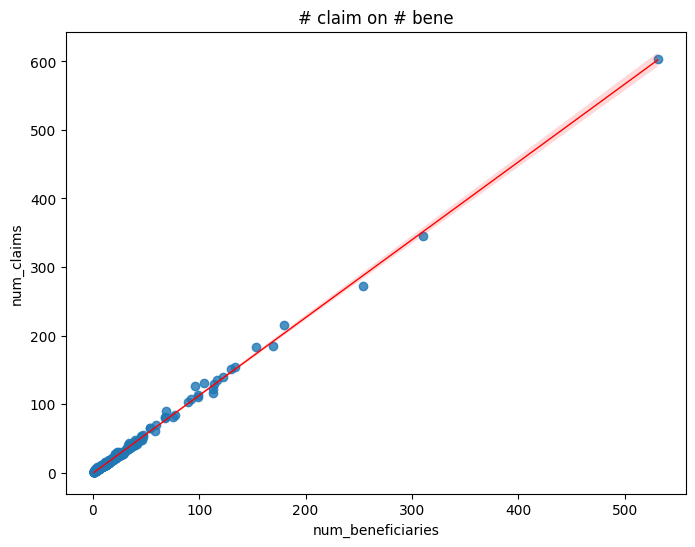

In [43]:
# scatter plot to demonstrate the number of bene by num of claims
fig, ax = plt.subplots(figsize=(8,6))
sns.regplot(x=provider_stats['num_beneficiaries'], 
            y=provider_stats['num_claims'],
            line_kws={'color':'red', 'linewidth':1},
            ax=ax)

plt.title('# claim on # bene')
plt.show()

In [44]:
# It's just show too many for now, and it's not completley relevant but the format could be useful for later

# plt.figure(figsize=(8, 6))  # Set the figure size as needed
# sns.barplot(x=provider_stats['num_beneficiaries'], 
#             y=provider_stats['num_claims'], palette="tab20", legend=True)
# plt.xticks(rotation=45) # Rotate the country names for better readability
# plt.title('Top 20 providers and number of beneficiary')
# plt.xlabel('providers')
# plt.ylabel('beneficiary')
# plt.tight_layout()  # Adjust layout to fit all labels
# plt.show()

In [45]:
# adding train dataset with PotentialFraud here. need to fix the `merge`
train_path = '../Healthcare Provider Fraud Detection Analysis/Train-1542865627584.csv'
train_df = pd.read_csv(train_path).rename(columns=clear_cols)
new_df = provider_stats.merge(train_df, on='Provider', how='left')
new_df.sample(8)

,Provider,num_beneficiaries,num_claims,PotentialFraud
340,PRV55139,5,5,NaN
408,PRV56155,7,7,NaN
276,PRV54516,18,22,NaN
111,PRV52096,18,18,NaN
41,PRV51384,20,21,NaN
428,PRV56459,2,2,NaN
3,PRV51022,7,7,NaN
158,PRV52718,3,3,NaN


In [46]:
# plt.figure(figsize=(8, 6))  # Set the figure size as needed
# sns.barplot(x=new_df.Provider, y=new_df.BeneID, palette="tab20")
# plt.xticks(rotation=45) # Rotate the country names for better readability
# plt.title('Top 20 providers and number of beneficiary')
# plt.xlabel('providers')
# plt.ylabel('beneficiary')
# # plt.tight_layout()  # Adjust layout to fit all labels
# plt.show()

In [47]:
# new_df.sample(20)

# This is completley wrong. I need more time to understand what I want to do here with the grouping

In [48]:
# # Create a bar plot with Provider on x-axis and BeneID on y-axis
# plt.figure(figsize=(10,6))
# plt.bar(new_df['num_claims'], new_df['num_beneficiaries'])

# # Add labels to the axes
# plt.xlabel('Providers')
# plt.ylabel('Beneficiary IDs (Top 15)')

# # Set title for the plot
# plt.title('Top 15 Beneficiaries by ID')

# # Show values on top of each bar
# # for i, v in enumerate(new_df['BeneID']):
# #     plt.text(i, v + 5, str(v), color='black', ha="center")

# plt.xticks(rotation=45)
# # Display the plot
# plt.show()